In [1]:
import numpy as np 
import os 
from sklearn.metrics import confusion_matrix
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
class_names=['cats','dogs']
class_names_label={class_names:i for i, class_names in enumerate(class_names)}

W,H=224,224
print(class_names_label)

{'cats': 0, 'dogs': 1}


In [3]:
import tensorflow as tf

# Set the path for local directories
train_image_directory = r"C:\Users\Hp\Desktop\train2"

test_image_directory = r"C:\Users\Hp\Desktop\test2"

batch_size = 15
H, W = 224, 224  # Update the image size to your desired dimensions

# Load training data
train_data = tf.keras.utils.image_dataset_from_directory(train_image_directory,
                                                         validation_split=0.2,
                                                         seed=123,
                                                         subset="training",
                                                         image_size=(H, W),
                                                         batch_size=batch_size)
# Load validation data by using the remaining 20% from the split
validation_data = tf.keras.utils.image_dataset_from_directory(
    train_image_directory,
    validation_split=0.2,  # Same split ratio as for training data
    subset="validation",  # This subset will be the validation data
    seed=123,
    image_size=(H, W),
    batch_size=batch_size
)

# Load test data (you were using validation data for the test set)
test_data = tf.keras.utils.image_dataset_from_directory(test_image_directory,
                                                        seed=123,
                                                        image_size=(H, W),
                                                        batch_size=batch_size)

Found 26062 files belonging to 2 classes.
Using 20850 files for training.
Found 26062 files belonging to 2 classes.
Using 5212 files for validation.
Found 3999 files belonging to 2 classes.


In [4]:
for image, lable in train_data.take(1):
    print(f"Image shape with Batch_Size:{image.shape}")
    print("_____________________________________________")
    print(f"Shape of the image is:{image[0].shape}")
    print("_____________________________________________")
    print(f"Label of the image is:{class_names[lable[0]]}")
    print("_____________________________________________")
    print(f"Image is in the form of tensor:{image[0]}")

Image shape with Batch_Size:(15, 224, 224, 3)
_____________________________________________
Shape of the image is:(224, 224, 3)
_____________________________________________
Label of the image is:dogs
_____________________________________________
Image is in the form of tensor:[[[ 12.        12.        12.      ]
  [ 12.        12.        12.      ]
  [ 12.        12.        12.      ]
  ...
  [ 25.910767  25.910767  25.910767]
  [ 32.4599    32.4599    32.4599  ]
  [ 37.        37.        37.      ]]

 [[ 12.504464  12.504464  12.504464]
  [ 12.504464  12.504464  12.504464]
  [ 12.416634  12.416634  12.416634]
  ...
  [ 26.327402  26.327402  26.327402]
  [ 33.464333  33.464333  33.464333]
  [ 38.513393  38.513393  38.513393]]

 [[ 13.        13.        13.      ]
  [ 13.        13.        13.      ]
  [ 12.856206  12.856206  12.856206]
  ...
  [ 26.736664  26.736664  26.736664]
  [ 34.192154  34.192154  34.192154]
  [ 39.47768   39.47768   39.47768 ]]

 ...

 [[110.1741   110.1741   1

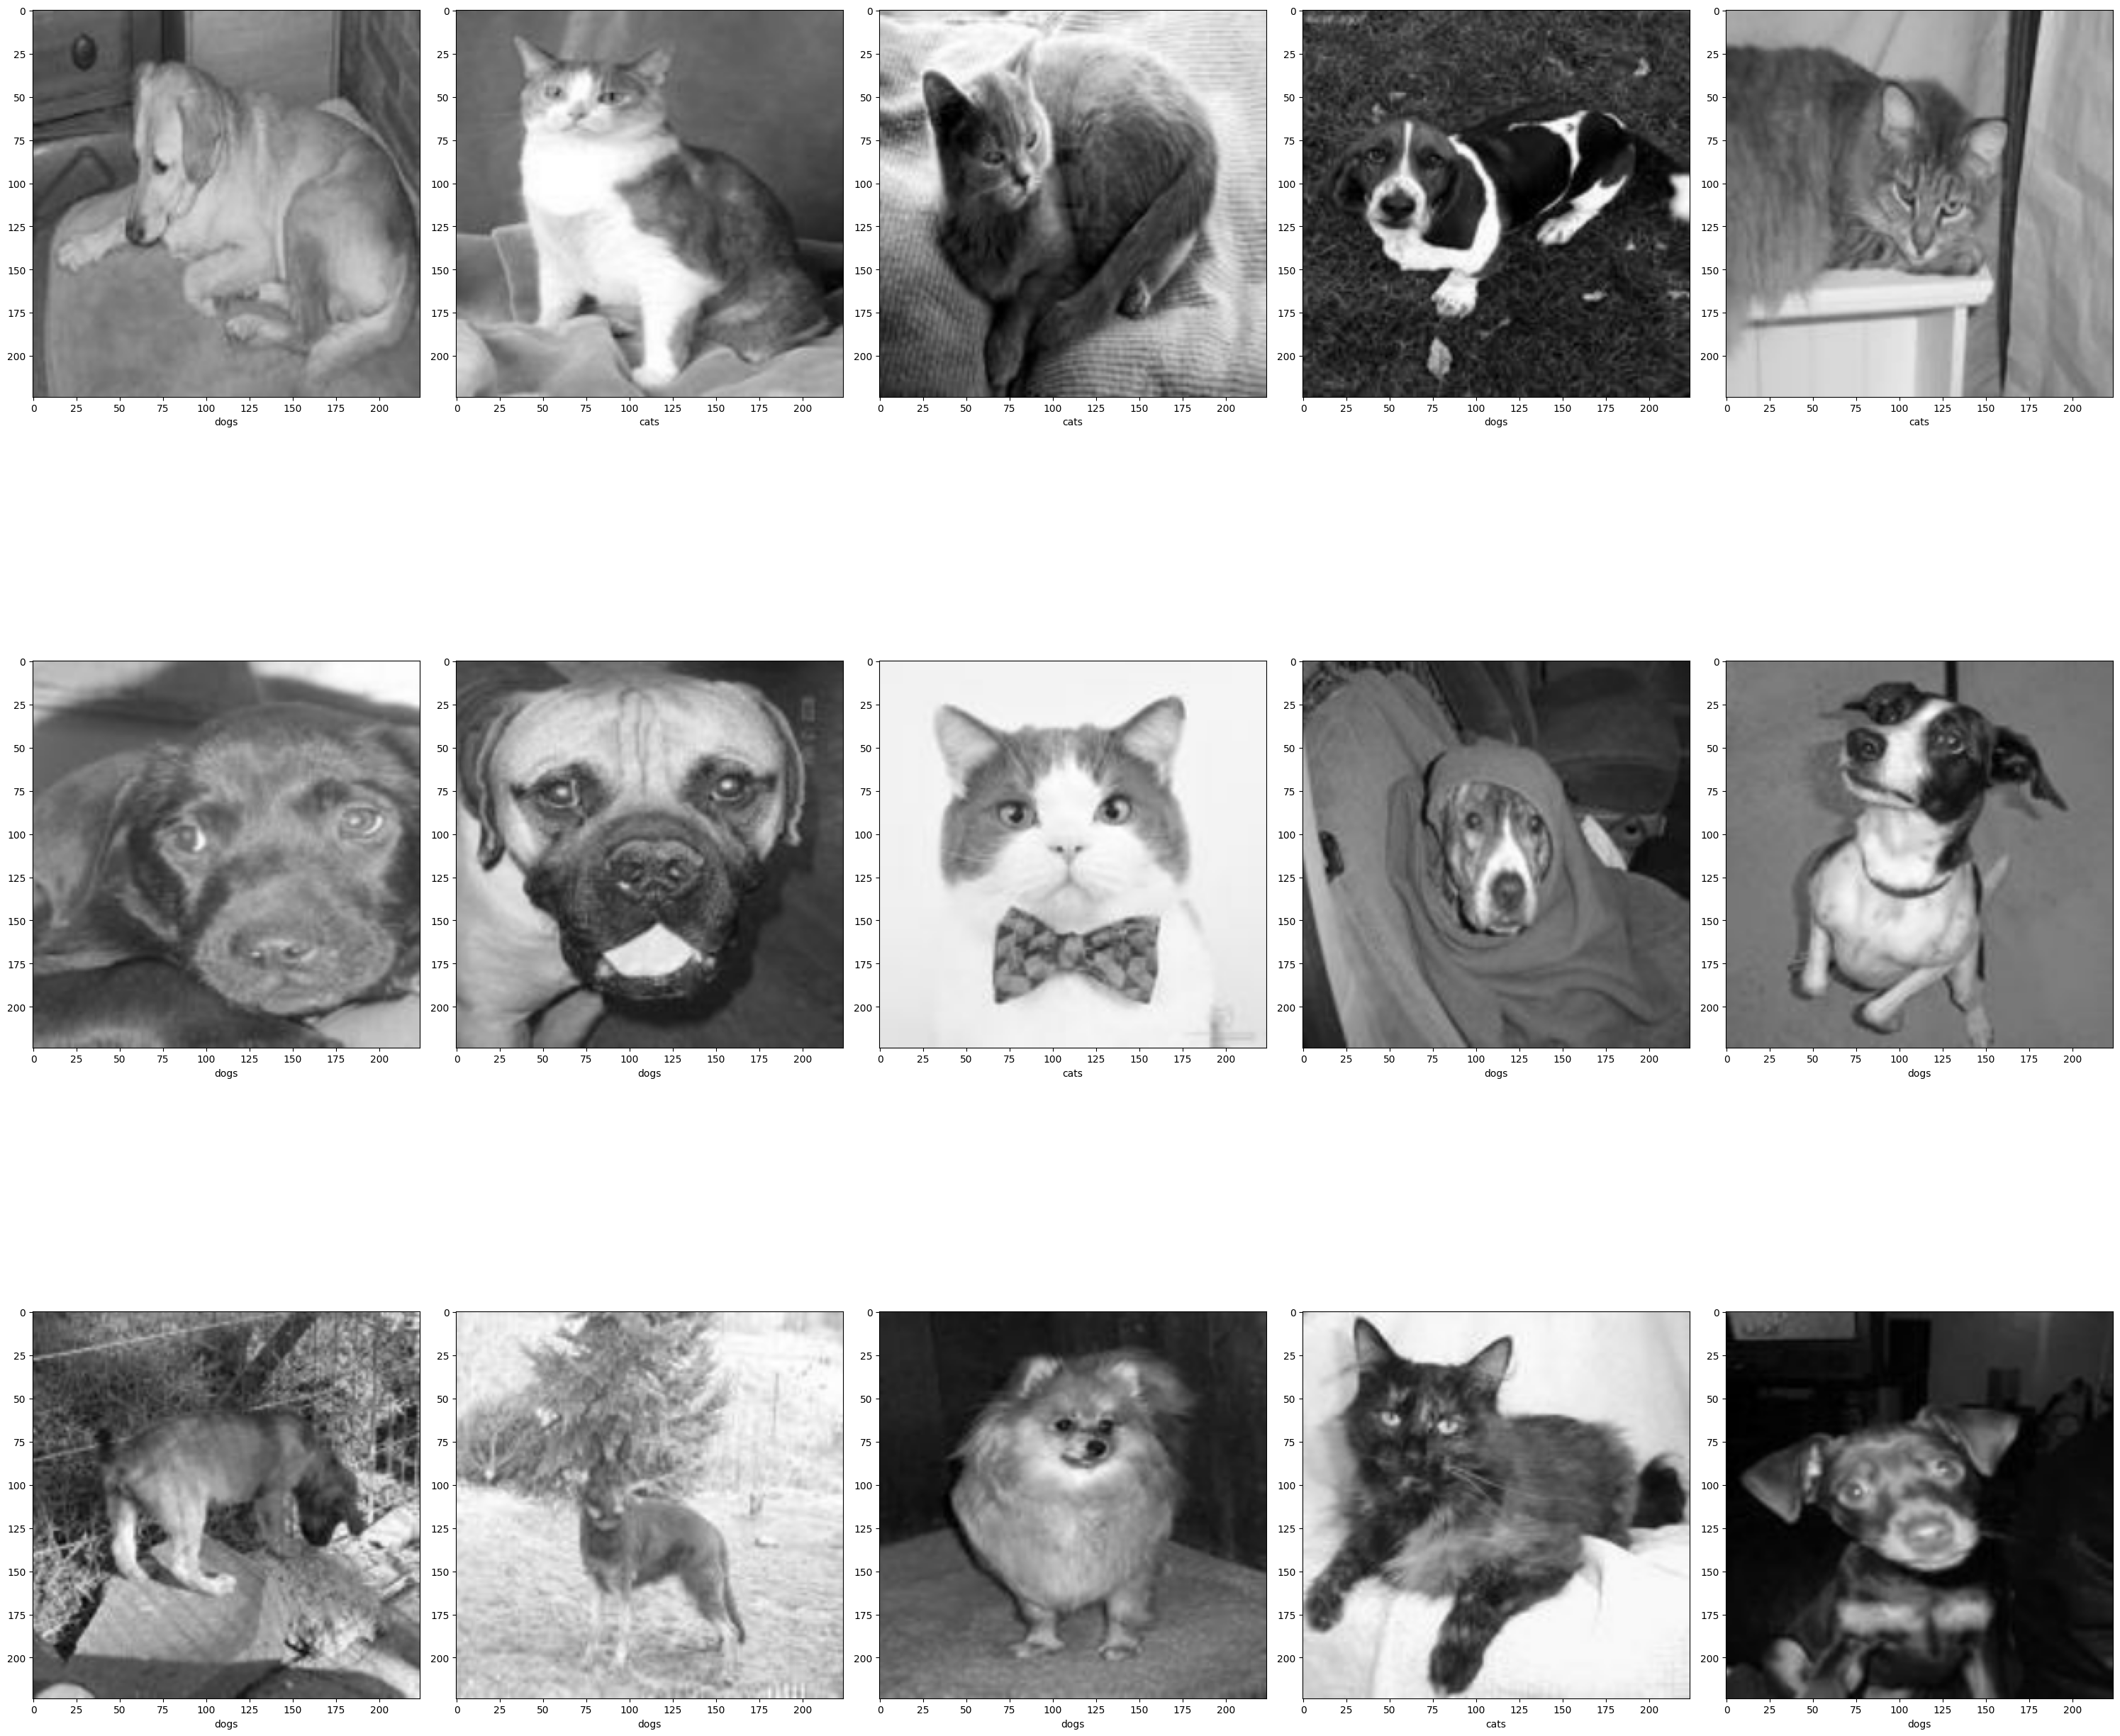

In [5]:
plt.figure(figsize=(30,30), tight_layout=True)
for image, label in train_data.take(1):
    for i in range(15):
        plt.subplot(3,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.xlabel(class_names[label[i]])
    
    plt.show()

In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Number of classes for classification (2: Cats and Dogs)
num_classes = 2

# Use ImageNet pre-trained weights
weights_path = 'imagenet'  # Use the official ImageNet pre-trained weights

# Load VGG16 model (without top layers and using pre-trained weights)
vgg_model = VGG16(include_top=False, pooling='avg', weights=weights_path, input_shape=(224, 224, 3))

# Build the Sequential model
model = Sequential()

# Add the VGG16 model as the base (pre-trained) model
model.add(vgg_model)
model.add(Flatten())  # Flatten the output from the VGG16 model

# Add a Dense layer with softmax activation for classification (2 classes: Cats and Dogs)
model.add(Dense(num_classes, activation='softmax'))

# Freeze the base model (VGG16 layers) to avoid retraining them
model.layers[0].trainable = False

# Compile the model with Adam optimizer and categorical crossentropy loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()
model.save('my_trained_model.h5')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 512)                 │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,715,714 (56.14 MB)

 Trainable params: 1,026 (4.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [7]:
Model: "sequential"

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

# Assuming you have directories defined for train and validation
train_image_directory = r"C:\Users\Hp\Desktop\train2"
validation_image_directory = r"C:\Users\Hp\Desktop\test2"

# Image dimensions (H and W should be defined, for example 224x224)
H, W = 224, 224

# Create ImageDataGenerator for training
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    preprocessing_function=preprocess_input  # This is for VGG16-specific preprocessing
)

# Train generator
train_generator = train_datagen.flow_from_directory(
    train_image_directory,  # Path to training data
    target_size=(H, W),     # Resize images to (H, W)
    batch_size=100,
    class_mode='categorical'  # Since it's a multi-class classification
)

# Create ImageDataGenerator for validation
validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Validation generator
validation_generator = validation_datagen.flow_from_directory(
    validation_image_directory,  # Path to validation data
    target_size=(H, W),          # Resize images to (H, W)
    batch_size=100,
    class_mode='categorical'
)

Found 26062 images belonging to 2 classes.
Found 3999 images belonging to 2 classes.


In [9]:
# Training the model 
fit_history = model.fit( train_generator, 
                    validation_data=validation_generator,
                    steps_per_epoch=10,
                    epochs=5,
                    batch_size=100,
                    validation_steps=10
                    )

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 105s 11s/step - accuracy: 0.3696 - loss: 4.3081 - val_accuracy: 0.4900 - val_loss: 2.5104
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 97s 10s/step - accuracy: 0.5026 - loss: 2.1487 - val_accuracy: 0.6400 - val_loss: 1.5282
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 97s 10s/step - accuracy: 0.7084 - loss: 1.0581 - val_accuracy: 0.7360 - val_loss: 1.0226
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 97s 10s/step - accuracy: 0.7971 - loss: 0.6587 - val_accuracy: 0.7620 - val_loss: 0.9039
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 97s 10s/step - accuracy: 0.8089 - loss: 0.6200 - val_accuracy: 0.8160 - val_loss: 0.7256


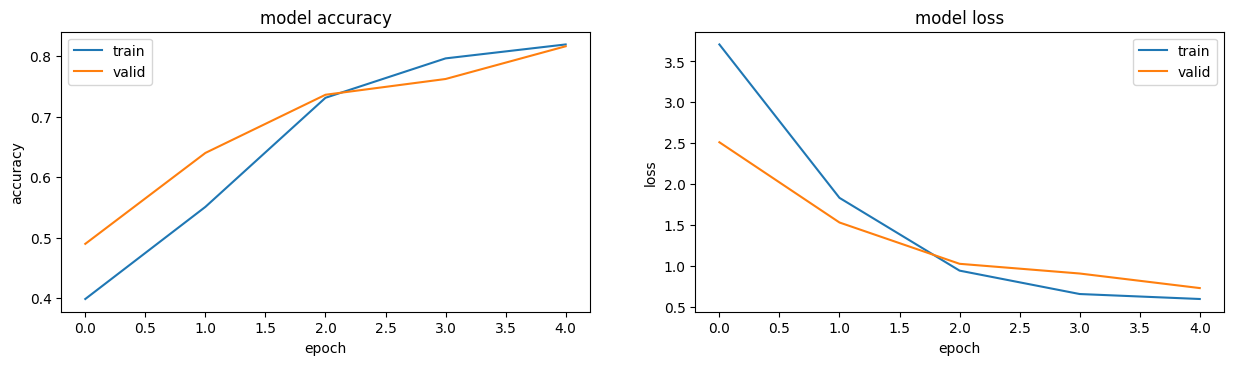

In [10]:
 plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['accuracy'])  
plt.plot(fit_history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

125/125 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step


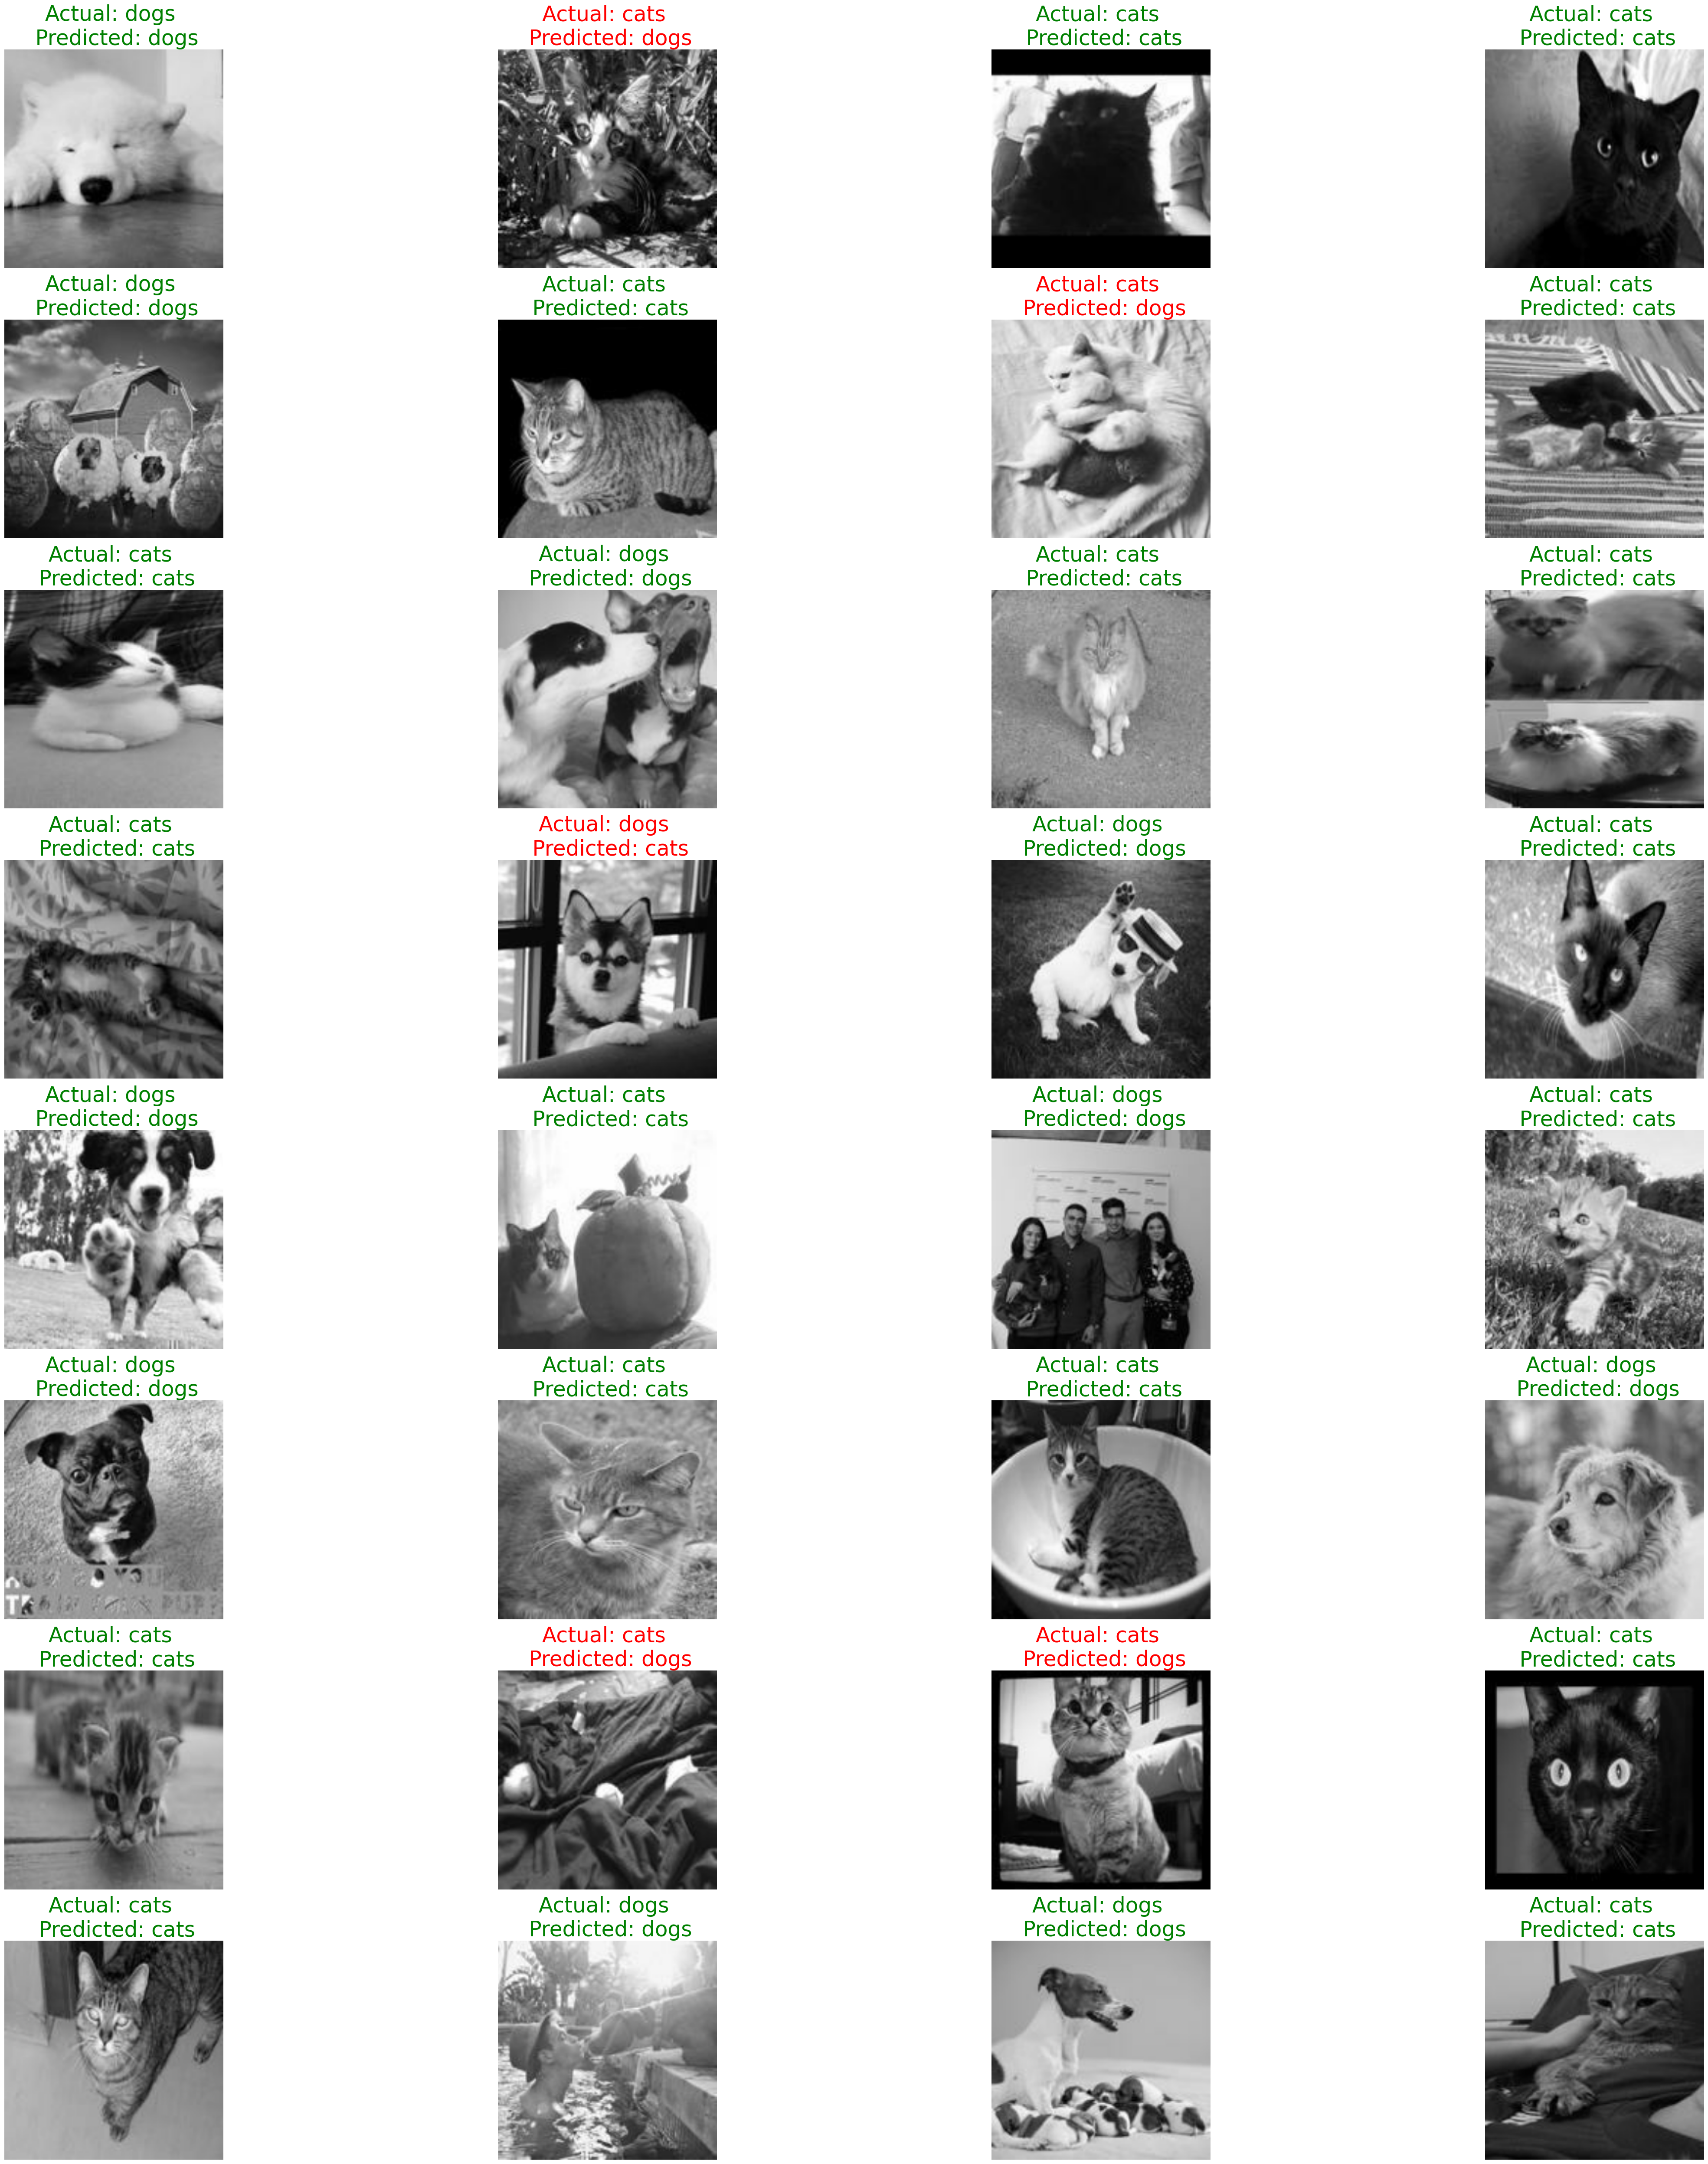

In [11]:
x_val=[]
y_val=[]
y_pred=[]

for images, labels in test_data:
    x_val.extend(images.numpy())
    y_val.extend(labels.numpy())
    

predictions=model.predict(np.array(x_val))
for i in predictions:
    y_pred.append(np.argmax(i))


plt.figure(figsize=(50, 50),tight_layout=True)

for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(x_val[i].astype("uint8"))
    actual_label = class_names[y_val[i]]
    predicted_label = class_names[y_pred[i]]
    
    # Check if the actual and predicted labels are the same
    if actual_label == predicted_label:
        label_color = 'green'
    else:
        label_color = 'red'
    
    plt.title(f'Actual: {actual_label} \n Predicted: {predicted_label}', color=label_color, fontsize=35)
    plt.axis("off")

plt.show()

Found 3999 images belonging to 2 classes.
125/125 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step


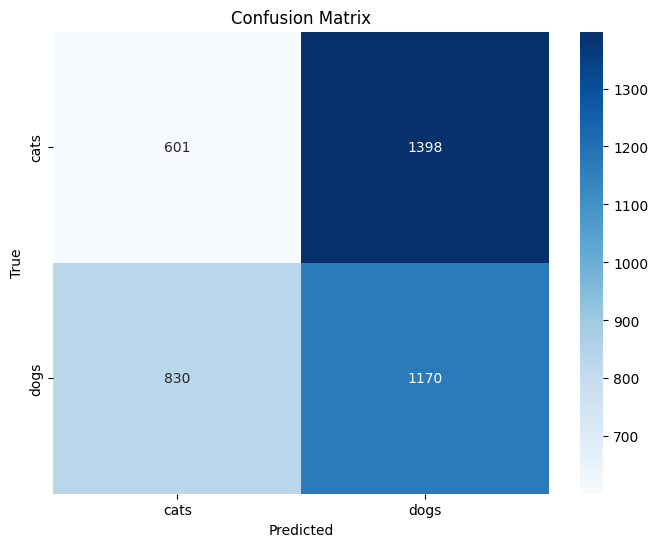

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load your trained model
model = load_model('my_trained_model.h5')

# Prepare the test dataset (resizing the images)
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    r'C:\Users\Hp\Desktop\test2',  # Raw string notation # Replace with your test dataset path
    target_size=(224, 224),  # Ensure test data is also resized to (224, 224)
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # This is important to maintain the order for predictions
)

# Predict the classes on the test dataset
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels from the test dataset
y_true = test_data.classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices, yticklabels=test_data.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Print the test results
test_loss, test_acc = model.evaluate(test_data, verbose=1)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.3364 - loss: 0.7239
Test Accuracy: 44.29%
Test Loss: 0.7081
